# Problem Statement

Yulu, a micro-mobility service provider, is experiencing revenue dips and seeks to understand the key factors influencing the demand for their shared electric cycles in the Indian market. The goal is to identify which variables are statistically significant predictors of cycle demand and to quantify how well these variables explain the variations in demand. This understanding will inform strategies to address revenue challenges and optimize their service.

By understanding these factors and their collective impact, Yulu can potentially optimize cycle distribution, pricing strategies, marketing efforts, and overall operations to boost revenue and achieve their mission of providing sustainable commuting solutions.

# Basic Metrics

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
from google.colab import files
uploaded = files.upload()

Saving Yulu.csv to Yulu.csv


In [3]:
data=pd.read_csv('Yulu.csv')

In [7]:
#shape of the data
data.shape

(10886, 12)

In [8]:
#first five rows of the data
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
#columns in the data
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

**Column Profiling:**

**datetime:** datetime

**season:** season (1: spring, 2: summer, 3: fall, 4: winter)

**holiday:** whether day is a holiday or not

**workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.

**weather:**

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**temp:** temperature in Celsius

**atemp:** feeling temperature in Celsius

**humidity:** humidity

**windspeed:** wind speed

**casual:** count of casual users

**registered:** count of registered users

**count:** count of total rental bikes including both casual and registered

In [12]:
#datatype
data.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [13]:
#conversion of categorical attributes to 'category'
data['season']=data['season'].astype('category')
data['holiday']=data['holiday'].astype('category')
data['workingday']=data['workingday'].astype('category')
data['weather']=data['weather'].astype('category')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 723.7+ KB


In [16]:
#missing values detection
data.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


There are no missing values in the given dataset.

In [17]:
#Statistical summary
data.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Exploratory Data Analysis

## Non-Graphical Analysis

In [18]:
#Value Counts
data.value_counts()

,,,,,,,,,,,,count
datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,1
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,1
2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,1
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,1


In [19]:
data['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


1: spring, 2: summer, 3: fall, 4: winter

Almost all the seasons have same number of rides.

In [20]:
data['holiday'].value_counts()

,count
holiday,
0,10575
1,311


In [21]:
data['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


In [22]:
data['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Most of the rides are on days when the weather is pleasant,clear,Few clouds and partly cloudy.
There are almost no rides when there is heavy rain and thunderstorms.

In [23]:
data['datetime']=pd.to_datetime(data['datetime'])

In [24]:
data['day']=data['datetime'].dt.day
data['month']=data['datetime'].dt.month
data['year']=data['datetime'].dt.year
data['hour']=data['datetime'].dt.hour

In [25]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011,4


In [26]:
data['year'].value_counts()

,count
year,
2012,5464
2011,5422


In [27]:
data['month'].value_counts()

,count
month,
8,912
7,912
6,912
5,912
12,912
10,911
11,911
4,909
9,909


In [28]:
data['day'].value_counts()

,count
day,
1,575
9,575
5,575
17,575
16,574
19,574
7,574
8,574
15,574


In [29]:
data['hour'].value_counts()

,count
hour,
16,456
17,456
18,456
19,456
12,456
13,456
14,456
15,456
20,456


In [30]:
#unique values
data.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


## Univariate Analysis

### Continuous Variables

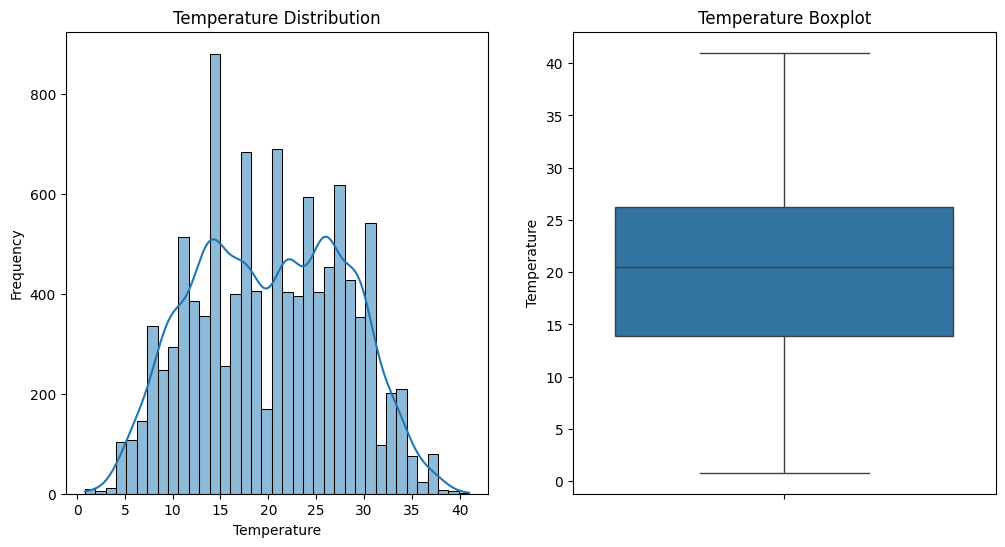

In [34]:
#Temperature distribution and boxplot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data['temp'],kde=True)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')

plt.subplot(1,2,2)
sns.boxplot(data['temp'])
plt.ylabel('Temperature')
plt.title('Temperature Boxplot')
plt.show()

From the temperature distribution and boxplots it is clear that most of the points are concentrated between 12 and 26 degree celcius.
There are no outliers in the plot.

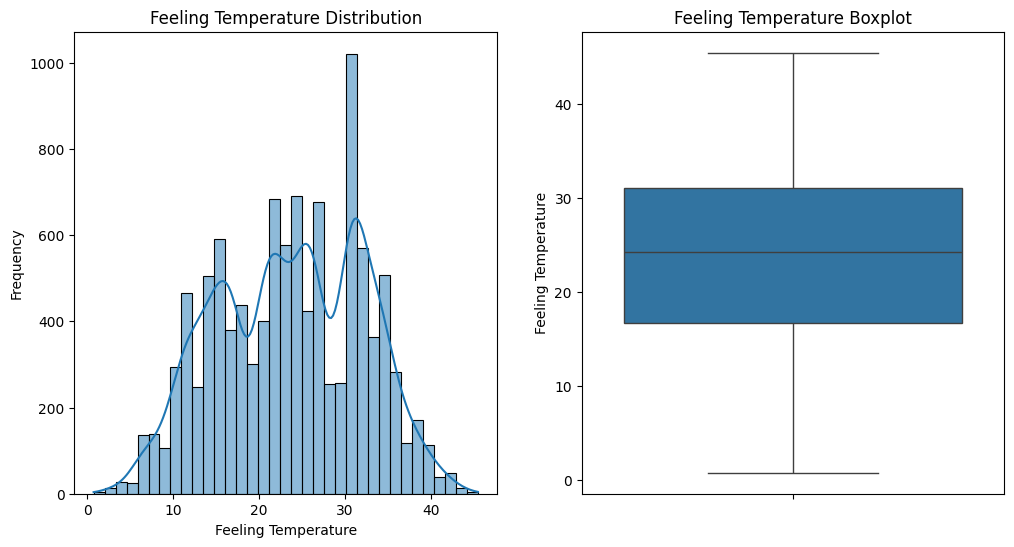

In [36]:
#Feeling temperature distribution and box plot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data['atemp'],kde=True)
plt.xlabel('Feeling Temperature')
plt.ylabel('Frequency')
plt.title('Feeling Temperature Distribution')

plt.subplot(1,2,2)
sns.boxplot(data['atemp'])
plt.ylabel('Feeling Temperature')
plt.title('Feeling Temperature Boxplot')
plt.show()

From the feeling temperature distribution and boxplots it is clear that most of the points are concentrated between 18 and 32 degree celcius.
There are no outliers in the plot.

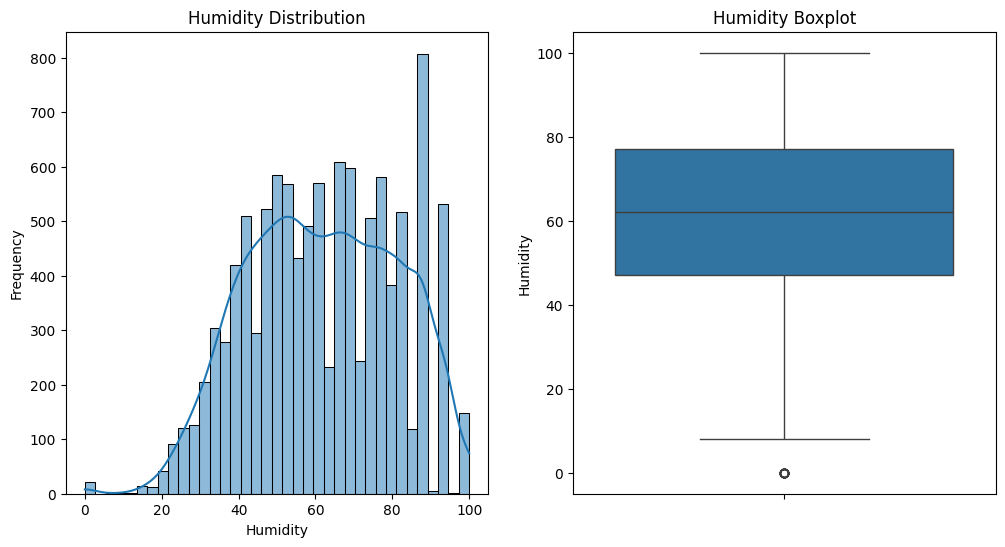

In [37]:
#Humidity distribution and boxplot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data['humidity'],kde=True)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')

plt.subplot(1,2,2)
sns.boxplot(data['humidity'])
plt.ylabel('Humidity')
plt.title('Humidity Boxplot')
plt.show()

The humidity distribution plot is slightly left skewed and there is one outlier as seen in the boxplot.

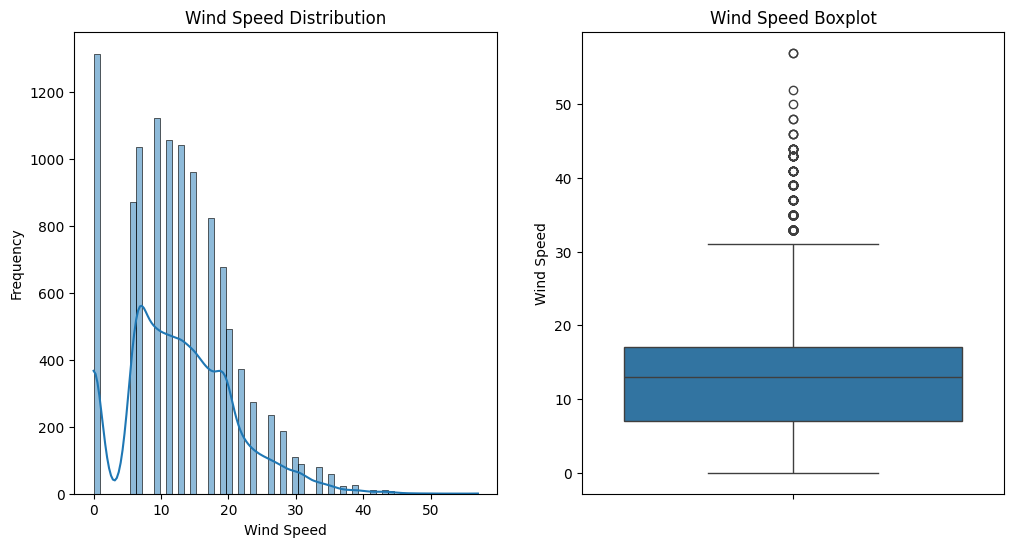

In [38]:
#Windspeed distribution and boxplot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data['windspeed'],kde=True)
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Wind Speed Distribution')

plt.subplot(1,2,2)
sns.boxplot(data['windspeed'])
plt.ylabel('Wind Speed')
plt.title('Wind Speed Boxplot')
plt.show()


The windspeed distribution plot is right skewed and there are many outliers as the plot has longer right tail.

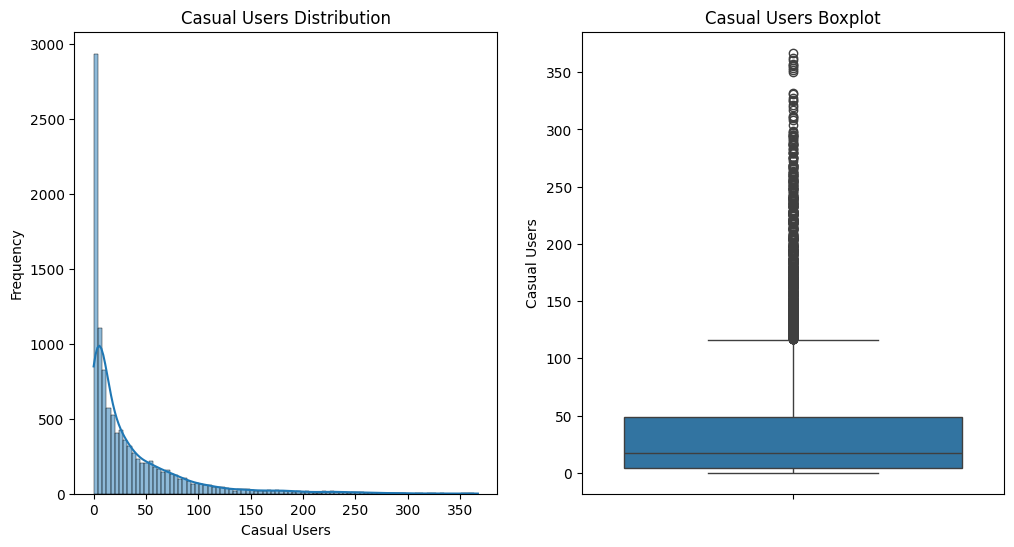

In [39]:
#Casual users distribution and boxplot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data['casual'],kde=True)
plt.xlabel('Casual Users')
plt.ylabel('Frequency')
plt.title('Casual Users Distribution')

plt.subplot(1,2,2)
sns.boxplot(data['casual'])
plt.ylabel('Casual Users')
plt.title('Casual Users Boxplot')
plt.show()

The casual users distribution plot is right skewed and has many outliers as seen in the boxplot.

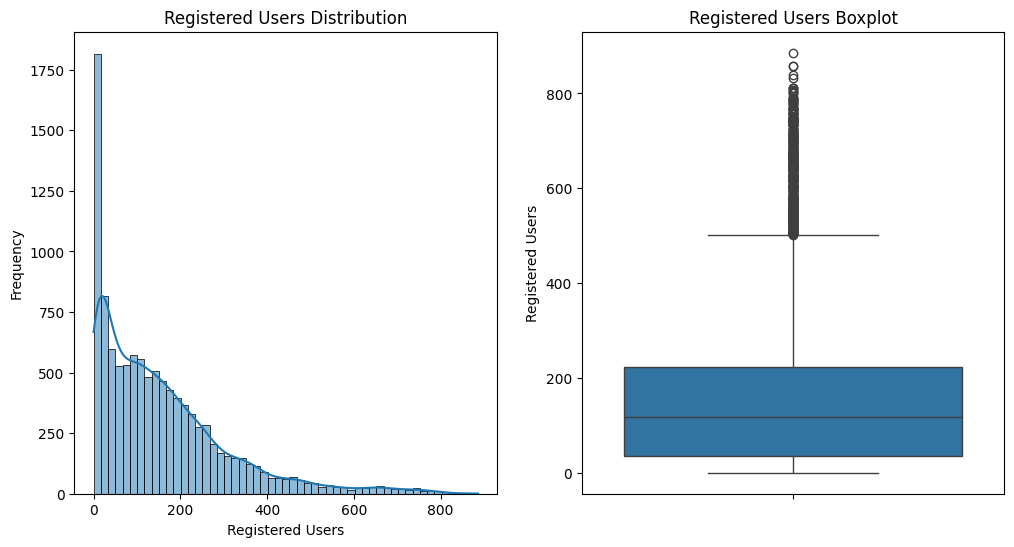

In [40]:
#Registered users distribution and boxplot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data['registered'],kde=True)
plt.xlabel('Registered Users')
plt.ylabel('Frequency')
plt.title('Registered Users Distribution')

plt.subplot(1,2,2)
sns.boxplot(data['registered'])
plt.ylabel('Registered Users')
plt.title('Registered Users Boxplot')
plt.show()

The registered users distribution plot is right skewed and has many outliers as seen in the boxplot.

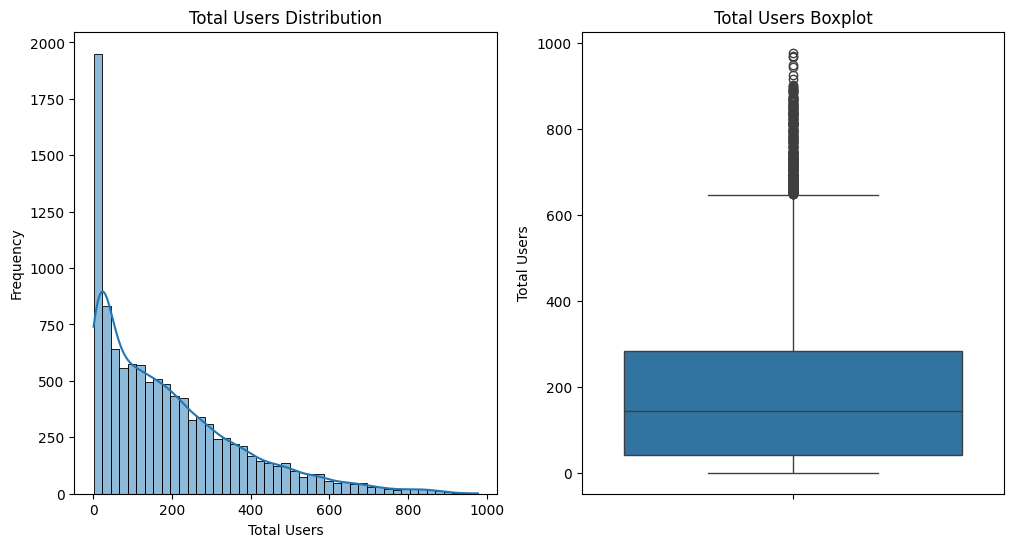

In [41]:
#Total users distribution and box plot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data['count'],kde=True)
plt.xlabel('Total Users')
plt.ylabel('Frequency')
plt.title('Total Users Distribution')

plt.subplot(1,2,2)
sns.boxplot(data['count'])
plt.ylabel('Total Users')
plt.title('Total Users Boxplot')
plt.show()

The distribution of total users is right-skewed, indicating that there are more instances with lower rental counts and fewer instances with very high rental counts. The boxplot clearly shows the presence of many outliers on the higher end, suggesting there are a significant number of hours with unusually high total bike rentals compared to the majority of the data.

From the above boxplots Humidity, Windspeed, Casual users, Registered users, Total users show outliers in their respective data.

###Categorical Variables

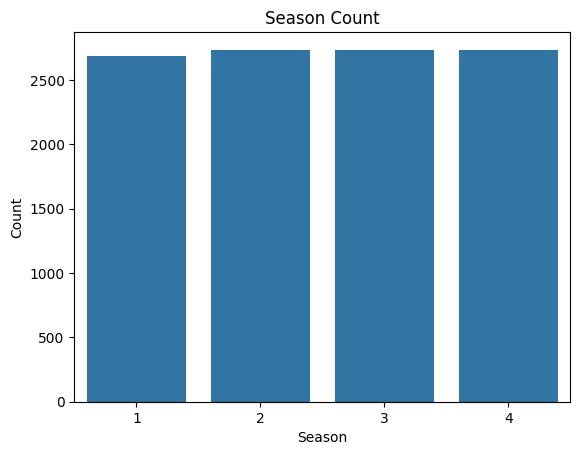

In [50]:
#countplot for Season
plt.figure()
sns.countplot(x=data['season'])
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Season Count')
plt.show()

Almost all the seasons have same number of rides.

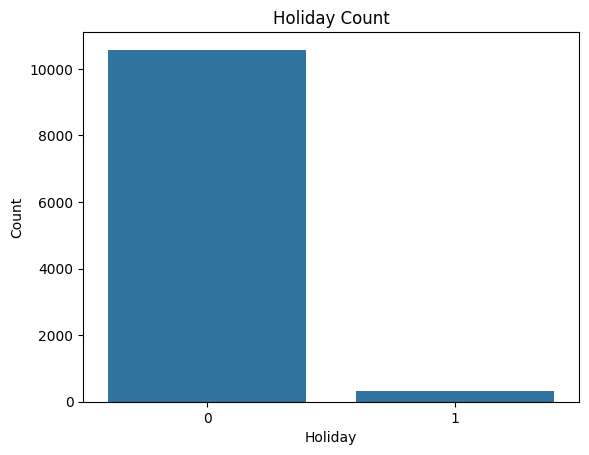

In [51]:
#countplot for Holidays
plt.figure()
sns.countplot(x=data['holiday'])
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.title('Holiday Count')
plt.show()

The number of rides on holidays is significantly less than on non-holidays.

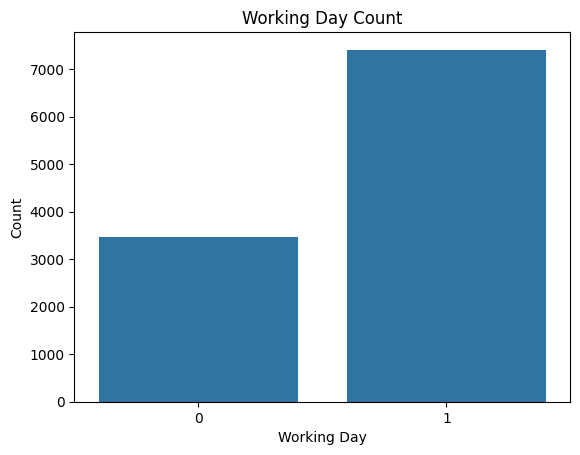

In [52]:
#countplot for Working days
plt.figure()
sns.countplot(x=data['workingday'])
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.title('Working Day Count')
plt.show()

There are more rides on working days compared to non-working days.

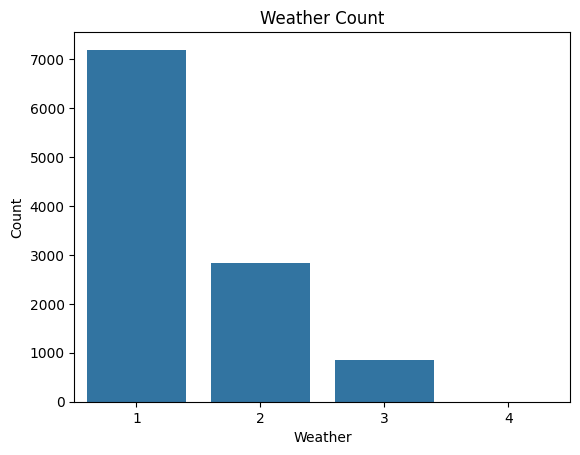

In [53]:
#countplot for weather
plt.figure()
sns.countplot(x=data['weather'])
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Weather Count')
plt.show()

Most of the rides are on days when the weather is pleasant,clear,Few clouds and partly cloudy.
There are almost no rides when there is heavy rain and thunderstorms.

## Bivariate Analysis

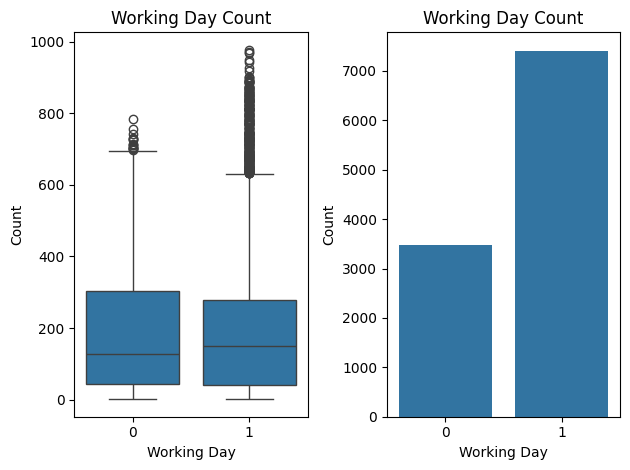

In [59]:
#Relationship between workday and count.
plt.figure()
plt.subplot(1,2,1)
sns.boxplot(x=data['workingday'],y=data['count'])
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.title('Working Day Count')

plt.subplot(1,2,2)
sns.countplot(x=data['workingday'])
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.title('Working Day Count')
plt.tight_layout()
plt.show()

The boxplot shows that the median bike rentals are similar on working days and non-working days. However, there appears to be a wider range of rentals and more outliers on working days. The countplot confirms that there are more data points for working days compared to non-working days, which aligns with the earlier observation from the value counts.

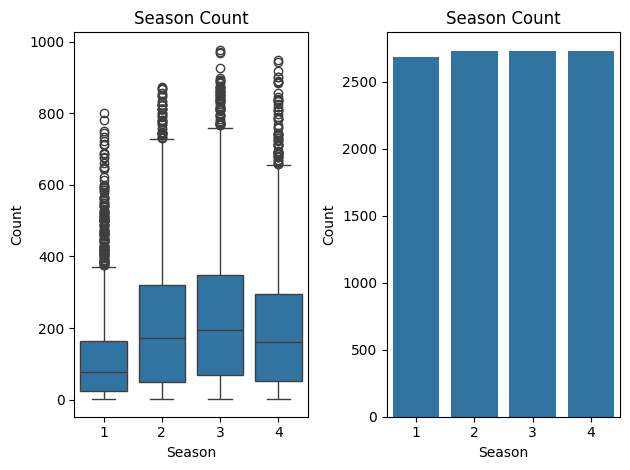

In [60]:
#Relationship between season and count.
plt.figure()
plt.subplot(1,2,1)
sns.boxplot(x=data['season'],y=data['count'])
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Season Count')

plt.subplot(1,2,2)
sns.countplot(x=data['season'])
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Season Count')
plt.tight_layout()
plt.show()

The boxplot indicates that bike rental counts vary across different seasons. Spring (season 1) appears to have the lowest median rentals and the smallest range, while summer (season 2) and fall (season 3) show higher median rentals and a wider distribution, including more outliers. Winter (season 4) has rental counts between spring and summer/fall. The countplot shows a relatively even distribution of data points across all seasons, suggesting the differences in rental counts are likely due to seasonal effects rather than unequal sample sizes.

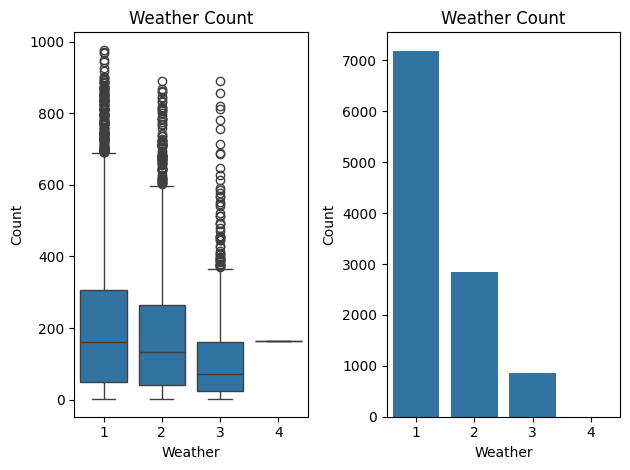

In [61]:
#Relationship between weather and count.
plt.figure()
plt.subplot(1,2,1)
sns.boxplot(x=data['weather'],y=data['count'])
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Weather Count')

plt.subplot(1,2,2)
sns.countplot(x=data['weather'])
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Weather Count')
plt.tight_layout()
plt.show()

The boxplot illustrates how bike rental counts are affected by different weather conditions. Weather type 1 (Clear, Few clouds) has the highest median rental counts and a wider distribution, while weather type 4 (Heavy Rain, Ice Pallets, etc.) has very few rentals, as also evident from the countplot which shows a significantly lower number of data points for weather type 4. Weather types 2 and 3 show intermediate rental counts. This suggests that weather conditions significantly influence the number of bike rentals.

## Multivariate Analysis


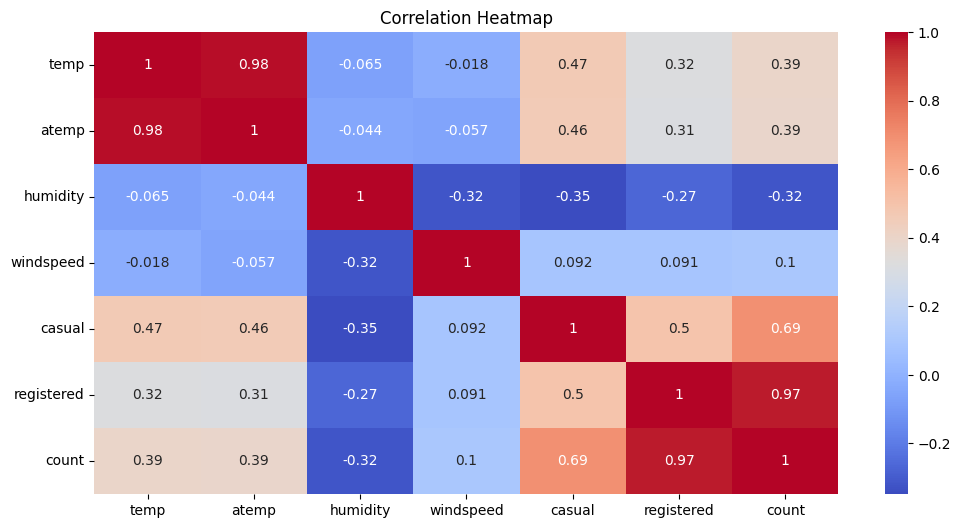

In [70]:

plt.figure(figsize=(12,6))
sns.heatmap(data[['temp','atemp','humidity','windspeed','casual','registered','count']].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows the correlation between the numerical variables.  'temp' and 'atemp' are highly positively correlated, as expected. 'casual' and 'registered' are positively correlated with 'count'. 'humidity' and 'windspeed' show weaker correlations with 'count'.

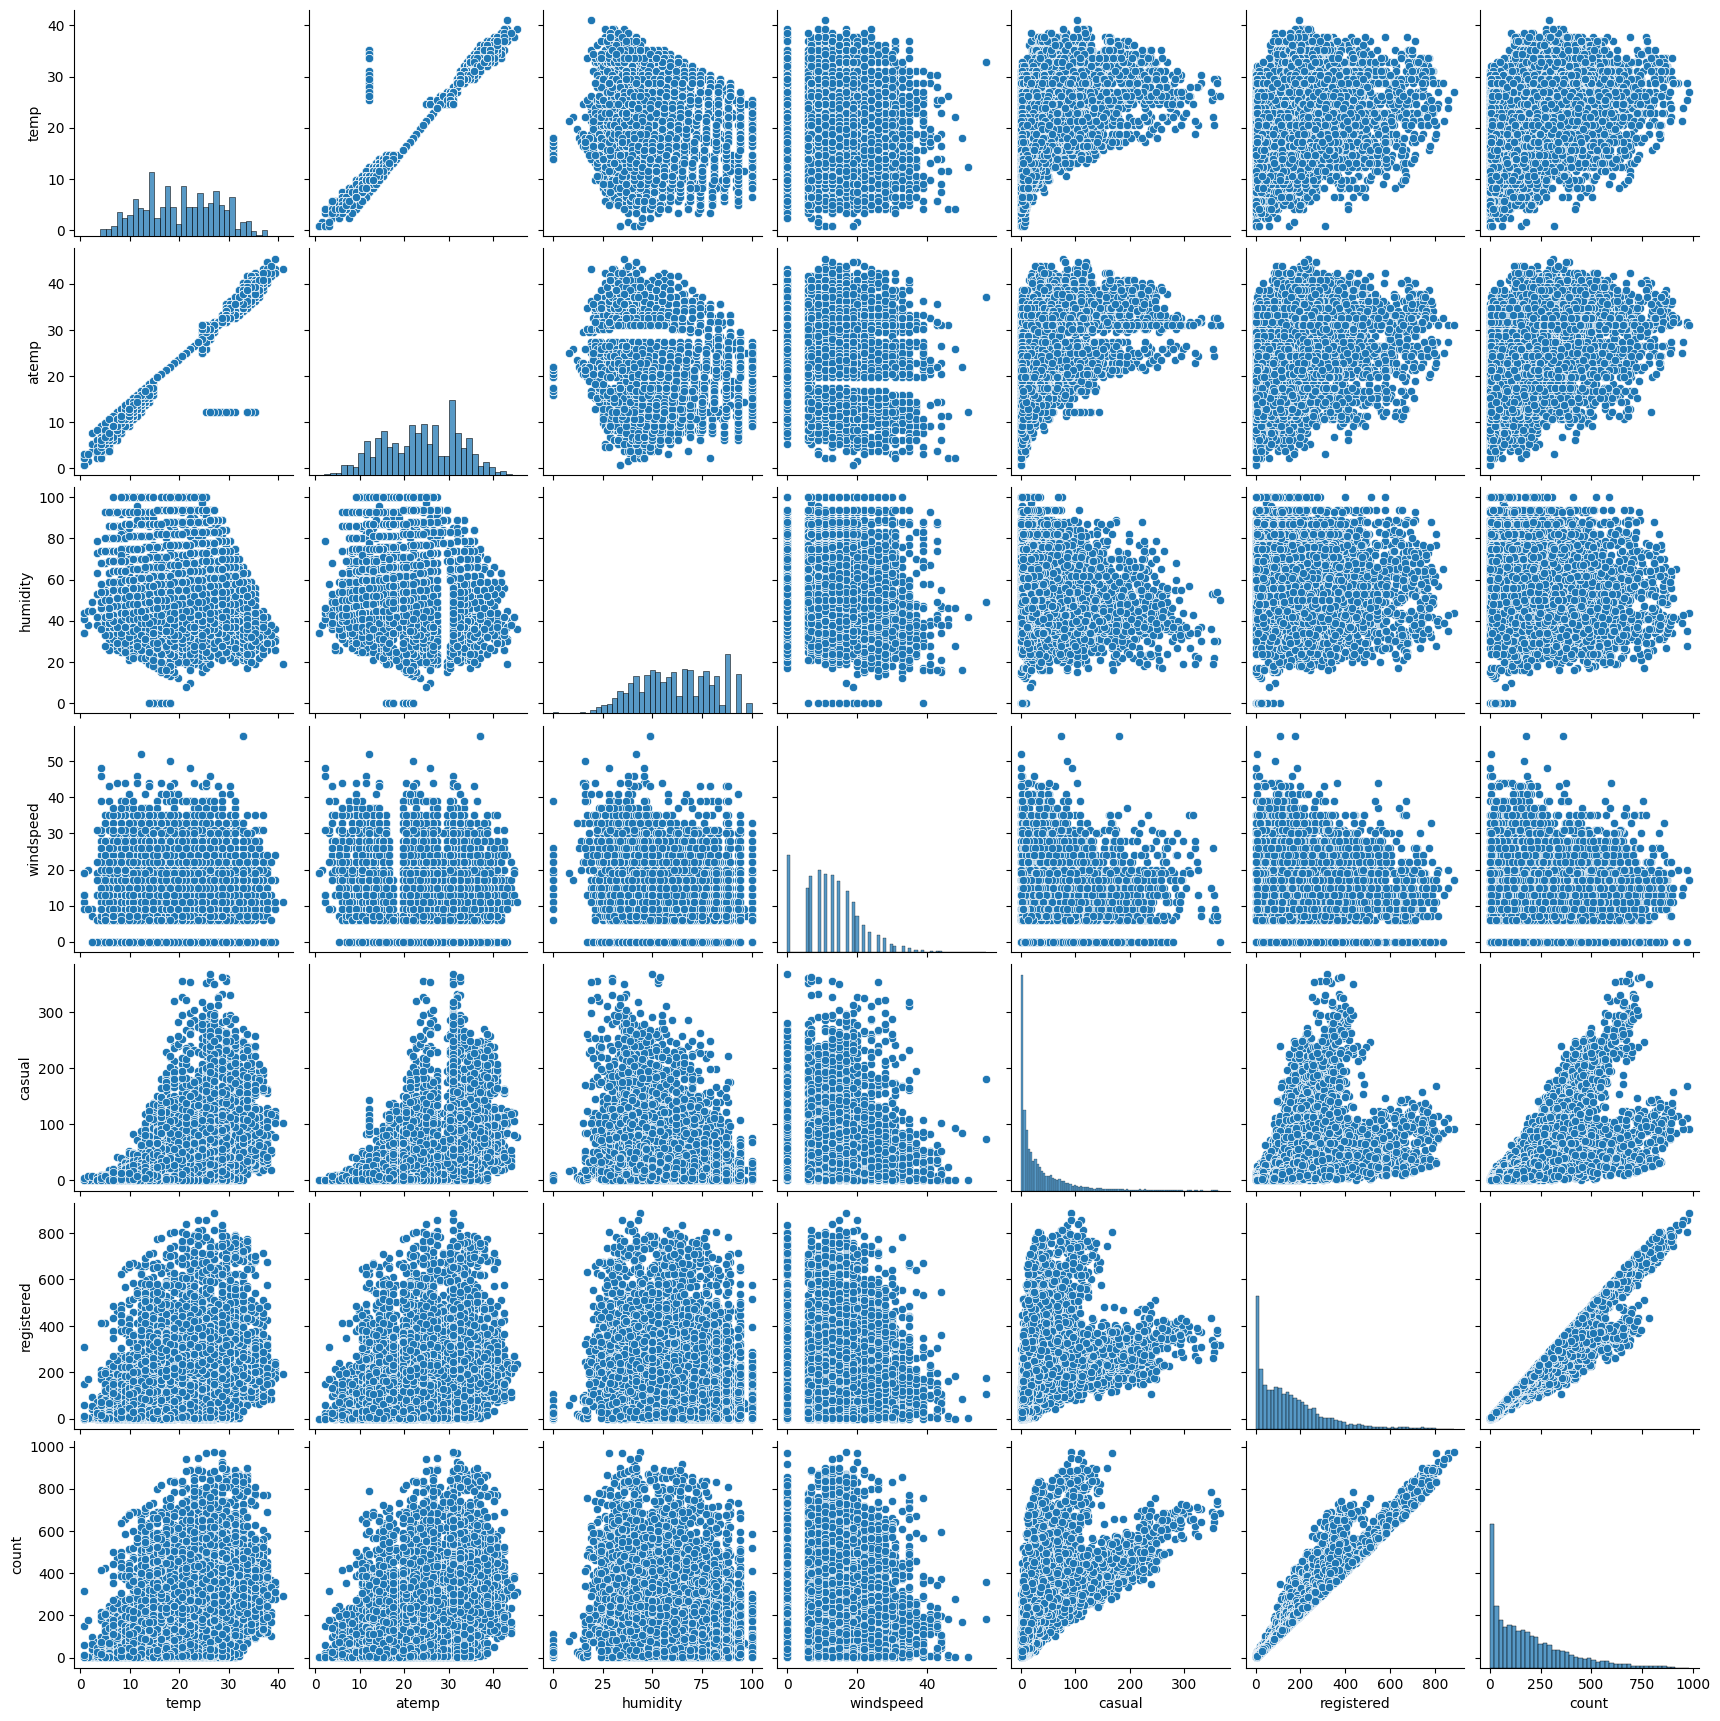

In [68]:
sns.pairplot(data[['season','holiday','workingday','temp','atemp','weather','humidity','windspeed','casual','registered','count']])
plt.show()

The pairplot shows the relationships between all pairs of variables. This helps visualize correlations and distributions.

##Insights based on EDA

**Insights based on EDA:**

*   **Range of Attributes:** We have observed the range of values for each attribute, such as temperature, humidity, windspeed, and the counts of casual and registered users.
*   **Outliers:** The boxplots revealed the presence of outliers in 'Humidity', 'Windspeed', 'Casual users', 'Registered users', and 'Total users', suggesting some instances with unusually high or low values for these variables.
*   **Distribution of Variables:**
    *   'Temperature' and 'Feeling Temperature' show distributions mostly concentrated within a certain range with no apparent outliers.
    *   'Humidity' and 'Windspeed' are slightly skewed, with 'Windspeed' showing a significant number of outliers.
    *   'Casual', 'Registered', and 'Total users' distributions are all right-skewed with numerous outliers, indicating a higher frequency of lower rental counts and fewer instances of very high rental counts.
    *   Categorical variables like 'Season', 'Holiday', 'Workingday', and 'Weather' show the frequency of each category, highlighting that most rentals occur during pleasant weather conditions and on working days.
*   **Relationship between Variables:**
    *   'Temp' and 'atemp' are highly correlated.
    *   'Casual', 'Registered', and 'count' are positively correlated, as expected.
    *   'Humidity' and 'Windspeed' have weaker correlations with 'count'.
    *   The boxplots for categorical variables against 'count' show that 'Season' and 'Weather' have a noticeable impact on the number of rentals, while 'Workingday' shows similar median rentals but a wider range and more outliers compared to non-working days.

# Hypothesis Testing

##**check if Working Day has an effect on the number of electric cycles rented?**

Working day is a categorical variable and has two categories, number of cycles rented is a numerical variable(categorical vs numerical).

n>>>>30,for large samples Central Limit Theorem allows mild violation of normality.

The appropriate test here is **2-Sample T-Test**.

In [87]:
#Null Hypothesis(H0): Working Day has no effect on the number of electric cycles rented.
#Alternate Hyothesis(Ha): Working Day has an effect on the number of electric cycles rented
#let Significance level be 5%
n=len(data['workingday'])
alpha=0.05

In [88]:
from scipy.stats import ttest_ind


In [89]:
test_statistic,pvalue=ttest_ind(data[data['workingday']==1]['count'],data[data['workingday']==0]['count'])

In [90]:
test_statistic,pvalue

(np.float64(1.2096277376026694), np.float64(0.22644804226361348))

In [91]:
if pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


Fail to reject the null hypothesis indicates that the null hypothesis is true.Working Day has no effect on the number of electric cycles rented.

##**check if No. of cycles rented is similar or different in different seasons?**

Season is a categorical variable and has more than two categories, number of cycles rented is a numerical variable.(categorical vs numerical).

More than two categories.
The appropriate test here is **Anova**

In [142]:
#Null Hypothesis(H0): Mean no. of cycles rented is same in different seasons.
#Alternate Hypothesis(Ha): Mean no. of cycles rented is different in different seasons.


Tests for assumption of anova


1.   Normality Test
2.   Homogeneity of Variance(Levene's Test)


1.   Independence of observations
  





In [93]:
#Normality Test(QQ Plot)
from statsmodels.api import qqplot


In [126]:
data_s1=data[data['season']==1]['count']
data_s2=data[data['season']==2]['count']
data_s3=data[data['season']==3]['count']
data_s4=data[data['season']==4]['count']

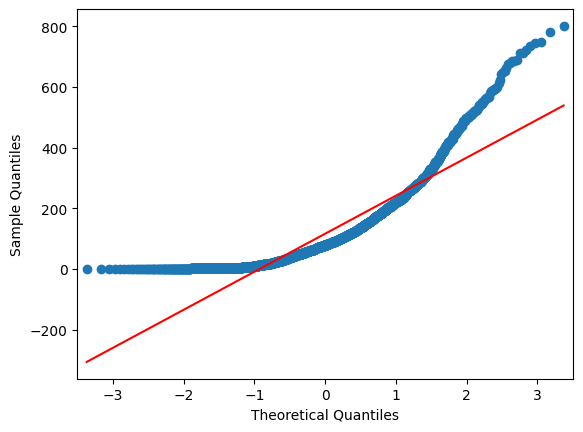

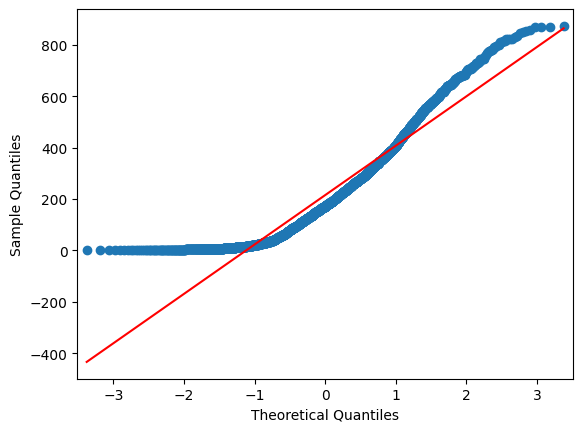

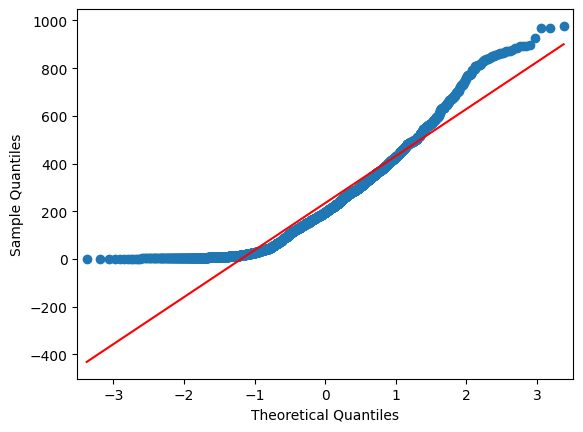

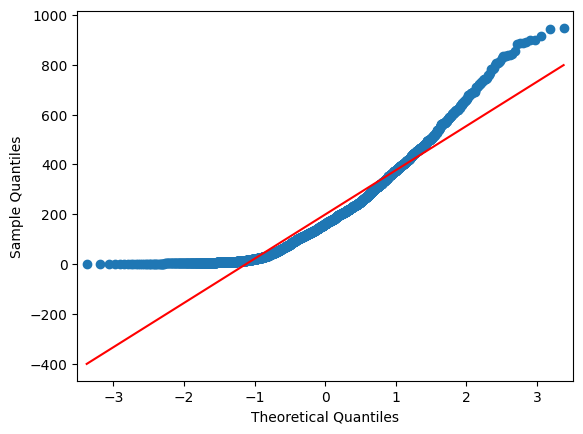

In [129]:
qqplot(data_s1,line='s')
qqplot(data_s2,line='s')
qqplot(data_s3,line='s')
qqplot(data_s4,line='s')
plt.show()

Based on the QQ plot, the data does not satisfy the normality assumption. The points do not follow the straight line.

In [101]:
#Normality test (shapiro)
from scipy.stats import shapiro
#Null Hypothesis(H0): The data is normally distributed.
#Alternate Hypothesis(Ha): The data is not normally distributed.
#let significance level be 5%
alpha = 0.05

In [131]:
stat_s1,pvalue_s1=shapiro(data_s1)
print(stat_s1,pvalue_s1)
stat_s2,pvalue_s2=shapiro(data_s2)
print(stat_s2,pvalue_s2)
stat_s3,pvalue_s3=shapiro(data_s3)
print(stat_s3,pvalue_s3)
stat_s4,pvalue_s4=shapiro(data_s4)
print(stat_s4,pvalue_s4)



0.8087378401253588 8.749584618867662e-49
0.9004818080893252 6.039374406270491e-39
0.9148166372899196 1.043680518918597e-36
0.8954637482095505 1.1299244409282836e-39


In [132]:
if pvalue_s1 or pvalue_s2 or pvalue_s3 or pvalue_s4 < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


As the null hypothesis is rejected the data is not normally distributed.

In [153]:
#Homogeneity of Variance(Levene's Test)
from scipy.stats import levene
#Null Hypothesis(H0): The variance of the samples are equal.
#Alternate Hypothesis(Ha): The variance of the samples are not equal.
#let significance level be 5%
alpha = 0.05

In [161]:
stat,pvalue=levene(data[data['season']==1]['count'],data[data['season']==2]['count'],data[data['season']==3]['count'],data[data['season']==4]['count'])
pvalue

np.float64(1.0147116860043298e-118)

In [155]:
if pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


The variance of the samples are not equal

From the above tests it is clear that the assumptions of anova are not satisfied.
A non-parametric test needs to be performed.

In this case Kruskal Wallis test can be performed.

In [143]:
#null hypothesis:Mean no. of cycles rented is same in different seasons
#alternate hypothesis:Mean no. of cycles rented is different in different seasons
#significance level is 5%
alpha=0.05

In [139]:
from scipy.stats import kruskal

In [160]:
stat,pvalue=kruskal(data_s1,data_s2,data_s3,data_s4)
pvalue

np.float64(2.479008372608633e-151)

In [141]:
if pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


From Kruskal Wallis test it is found that alternate hypothesis is true i.e, Mean no. of cycles rented is different in different seasons.

##**check if No. of cycles rented is similar or different in different weather?**

Weather is a categorical variable and has more than two categories, number of cycles rented is a numerical variable.(categorical vs numerical).

More than two categories.
The appropriate test here is **Anova**

In [145]:
#Null Hypothesis(H0): Mean no. of cycles rented is same in different weather.
#Alternate Hypothesis(Ha): Mean no. of cycles rented is different in different weather.


Tests for assumption of anova


1.   Normality Test
2.   Homogeneity of Variance(Levene's Test)


1.   Independence of observations

In [144]:
#Normality Test(QQ Plot)
from statsmodels.api import qqplot


In [146]:
data_w1=data[data['weather']==1]['count']
data_w2=data[data['weather']==2]['count']
data_w3=data[data['weather']==3]['count']
data_w4=data[data['weather']==4]['count']

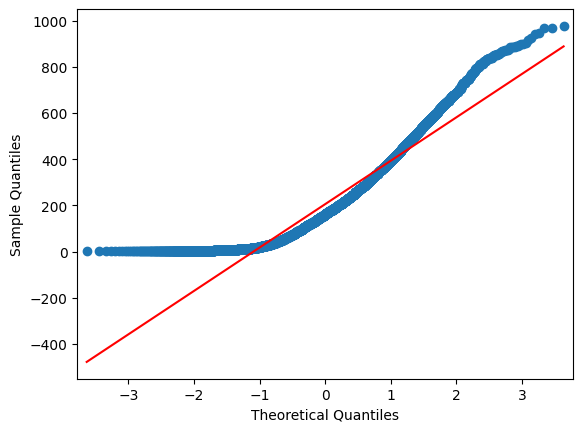

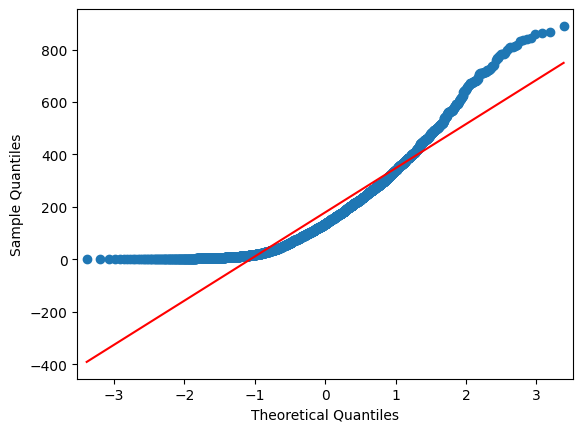

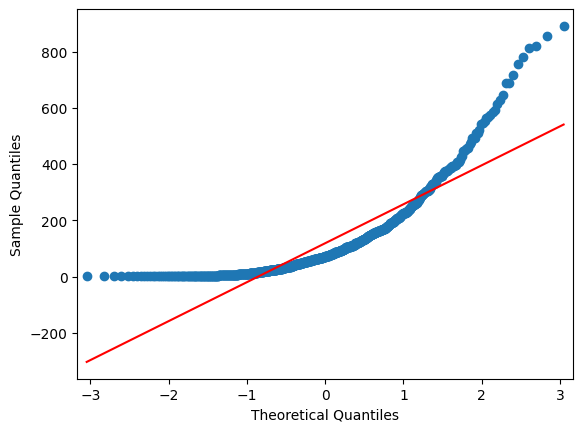

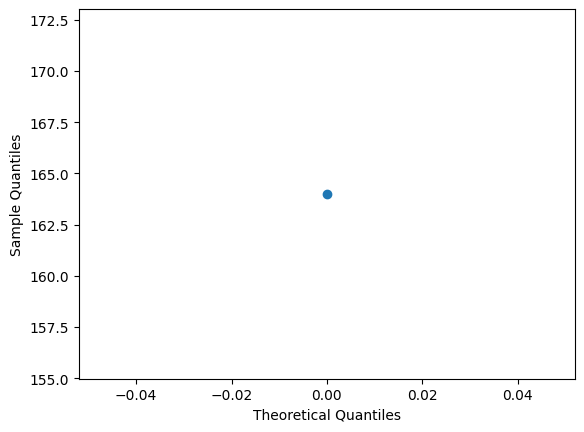

In [147]:
qqplot(data_w1,line='s')
qqplot(data_w2,line='s')
qqplot(data_w3,line='s')
qqplot(data_w4,line='s')
plt.show()

Based on the QQ plot, the data does not satisfy the normality assumption. The points do not follow the straight line.

In [148]:
stat_w1,pvalue_w1=shapiro(data_w1)
print(stat_w1,pvalue_w1)
stat_w2,pvalue_w2=shapiro(data_w2)
print(stat_w2,pvalue_w2)
stat_w3,pvalue_w3=shapiro(data_w3)
print(stat_w3,pvalue_w3)
stat_w4,pvalue_w4=shapiro(data_w4)
print(stat_w4,pvalue_w4)

0.8909259459740138 1.5964921477006555e-57
0.8767694973495206 9.777839106111785e-43
0.7674327906035717 3.875893017396149e-33
nan nan


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  res = hypotest_fun_out(*samples, **kwds)
/tmp/ipython-input-1992445154.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat_w4,pvalue_w4=shapiro(data_w4)


In [149]:
if pvalue_w1 or pvalue_w2 or pvalue_w3 or pvalue_w4 < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


As the null hypothesis is rejected the data is not normally distributed.

In [150]:
#Homogeneity of Variance(Levene's Test)
from scipy.stats import levene
#Null Hypothesis(H0): The variance of the samples is equal.
#Alternate Hypothesis(Ha): The variance of the samples is not equal.
#let significance level be 5%
alpha = 0.05

In [159]:
stat,pvalue=levene(data_w1,data_w2,data_w3,data_w4)
pvalue

np.float64(3.504937946833238e-35)

In [152]:
if pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


The variance of the samples are not equal

From the above tests it is clear that the assumptions of anova are not satisfied.
A non-parametric test needs to be performed.

In this case Kruskal Wallis test can be performed.

In [158]:
stat,pvalue=kruskal(data_w1,data_w2,data_w3,data_w4)
pvalue

np.float64(3.501611300708679e-44)

In [157]:
if pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


From Kruskal Wallis test it is found that alternate hypothesis is true i.e, Mean no. of cycles rented is different in different weather.

##**check if Weather is dependent on the season?**

Weather and Season both are categorical variables.

(Categorical vs Categorical)

The appropriate test is chi-square test of independence.


In [166]:
from math import hypot
from scipy.stats import chi2_contingency
#Null hypothesis(H0): Weather is independent of season.
#Alternate hypothesis(Ha): Weather is dependent of season.

In [167]:
contingency_table=pd.crosstab(data['weather'],data['season'])
contingency_table

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [169]:
Chi2_statistic,pvalue,dof,expected=chi2_contingency(contingency_table)
pvalue

np.float64(1.5499250736864862e-07)

In [170]:
if pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


As null hypothesis is rejected weather is dependent of season.

# Business Insights and Summary

Based on the hypothesis testing:

*   **Working Day:** The 2-Sample T-Test indicated that there is no statistically significant effect of 'Workingday' on the number of electric cycles rented. This suggests that the average number of rentals is similar on working days and non-working days, although the boxplot showed a wider range and more outliers on working days.
*   **Season:** The Kruskal Wallis test (used because the ANOVA assumptions were not met) showed that the mean number of cycles rented is significantly different across different seasons. The EDA also revealed that summer and fall generally have higher rental counts compared to spring and winter.
*   **Weather:** The Kruskal Wallis test (used because the ANOVA assumptions were not met) showed that the mean number of cycles rented is significantly different across different weather conditions. The EDA indicated that pleasant weather conditions (Clear, Few clouds) are associated with the highest rental counts, while heavy rain and thunderstorms result in almost no rentals.
* **Weather and Season:** The Chi-Square test of independence showed that Weather is dependent on Season. This suggests that certain weather conditions are more likely to occur during specific seasons.

Therefore, based on the hypothesis tests, **Season** and **Weather** appear to be significant variables in predicting the demand for shared electric cycles, while **Workingday** does not show a significant effect on the mean number of rentals. The EDA provided further insights into how these significant variables influence the distribution and range of rental counts, and the chi-square test revealed the dependence between weather and season.